<a href="https://colab.research.google.com/github/divya2648/cs480student/blob/main/02/CS480_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

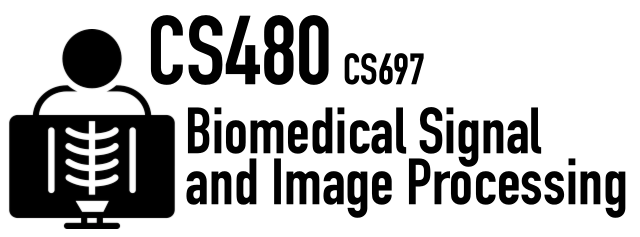
#Assignment 2

In [53]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [54]:
# we will be using the EEG/MEG analysis library MNE
# documentation is available here: https://mne.tools/stable/index.html
!pip install -U mne

In [55]:
import mne # let's import MNE

# .. and the sample dataset
from mne.datasets import sample

# These data were acquired with the Neuromag Vectorview system at 
# MGH/HMS/MIT Athinoula A. Martinos Center Biomedical Imaging. 
# EEG data from an electrode cap was acquired simultaneously with the MEG. 

### EXPERIMENT DESCRIPTION ###
# In this experiment, checkerboard patterns were presented to the subject into
# the left and right visual field, interspersed by tones to the left or right ear.
# The interval between the stimuli was 750 ms. Occasionally a smiley face was 
# presented at the center of the visual field. The subject was asked to press a 
# key with the right index finger as soon as possible after the appearance of the face.

In [56]:
# and let's load it!
data_path = sample.data_path()
raw = mne.io.read_raw_fif(data_path + '/MEG/sample/sample_audvis_raw.fif')

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


**Task 1:** How many EEG channels were used when acquiring the data? [15 Points]


In [57]:
# Hint: You can use raw.info or raw.ch_names to figure this out!
# TODO: YOUR ANSWER

In [58]:
sum("EEG" in s for s in raw.ch_names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


60

**Task 2:** Let's look at some channels! [20 Points]

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


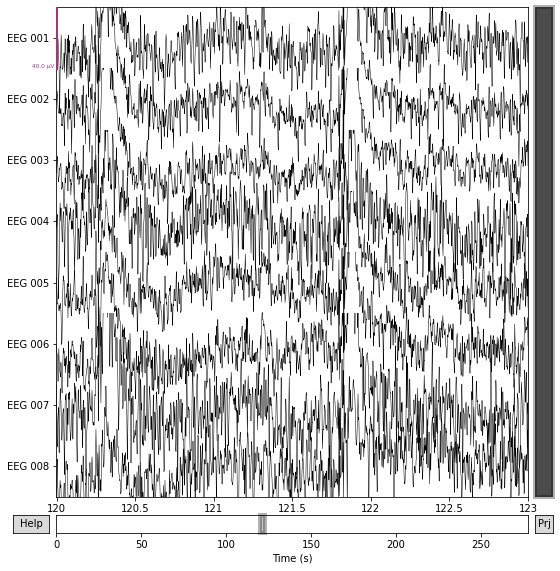

In [59]:
# the code below plots EEG channels 1-8 for 3 seconds after 2 minutes
chs = ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg1to8 = raw.plot(order=chan_idxs, start=120, duration=3)

In [60]:
# TODO please plot EEG channels 50-60 for 1 second after 200 seconds.

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


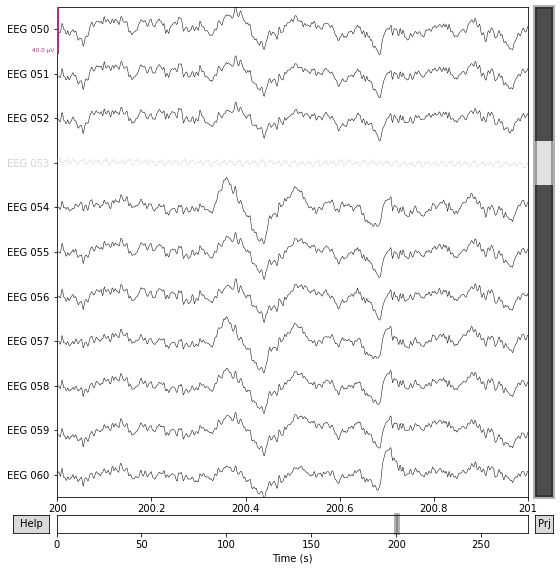

In [61]:
chs = ['EEG 050', 'EEG 051', 'EEG 052', 'EEG 053', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']
chan_idxs_50_to_60 = [raw.ch_names.index(ch) for ch in chs]
ecg50to60 = raw.plot(order=chan_idxs_50_to_60, start=200, duration=1)

**Task 3:** How long between event and brain activity? [30 Points]

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


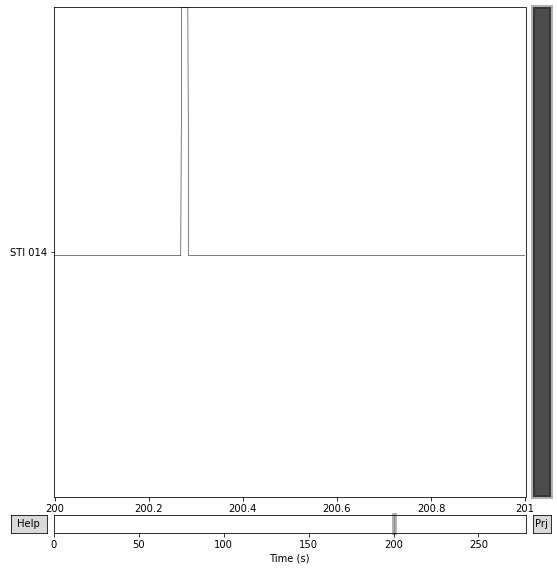

In [62]:
# the following code plots the stimulus channel for the same time
chan_idxs = [raw.ch_names.index('STI 014')]
stim = raw.plot(order=chan_idxs, start=200, duration=1)

In [63]:
# TODO Please combine the last two plots into one.
# the plot should show EEG channels 50-60 and the stimulus channel together.

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


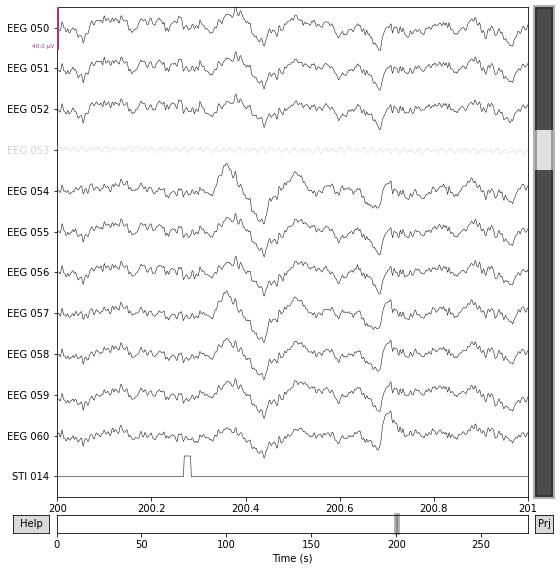

In [64]:
chan_idxs_50_to_60.append(raw.ch_names.index('STI 014'))
ecg50to60 = raw.plot(order=chan_idxs_50_to_60, start=200, duration=1)

In [65]:
# TODO Please estimate the time between stimulus and brain activity.
# TODO: YOUR ANSWER

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


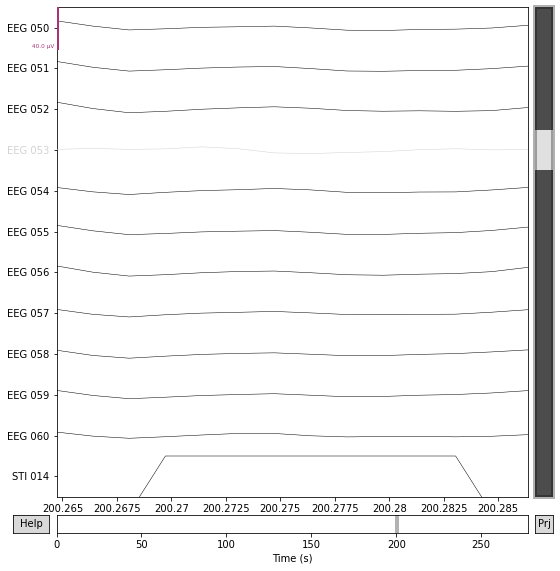

In [66]:
ecg50to60 = raw.plot(order=chan_idxs_50_to_60, start=200.265, duration=0.02)

As the graph depicts, the estimated time between stimulus and brain activity is 200.285 - 200.2675 = 0.0175 seconds approximately

**Task 4:** Localize different brain waves for different stimuli! [35 Points]

In [67]:
# the following code groups all stimuli together
# and allows the visualization of average brain activity per stimuli.
events = mne.find_events(raw, stim_channel='STI 014')
event_dict = {'auditory/left': 1, 
              'auditory/right': 2, 
              'visual/left': 3,
              'visual/right': 4, 
              'face': 5, 
              'button': 32}

picks = mne.pick_types(raw.info, eeg=True)

epochs = mne.Epochs(raw, events, event_id=event_dict, picks=picks,
                    preload=True)

320 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
3 projection items activated
Loading data for 320 events and 421 original time points ...
0 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows


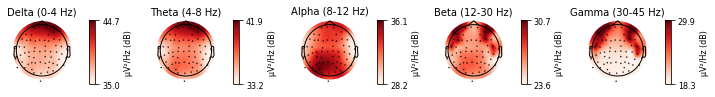

In [68]:
# here we see the average localized brain activity for the right visual stimuli
visual_activity = epochs['visual/right'].plot_psd_topomap()

    Using multitaper spectrum estimation with 7 DPSS windows


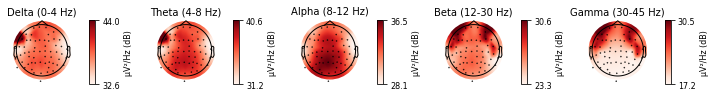

In [69]:
# here we see the average localized brain activity for the shown 'face'
face_activity = epochs['face'].plot_psd_topomap()

In [70]:
# TODO Please visualize the average brain activity when the subject pushes the button

    Using multitaper spectrum estimation with 7 DPSS windows


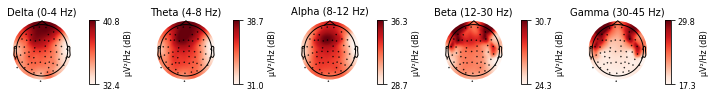

In [71]:
button_activity = epochs['button'].plot_psd_topomap()

In [72]:
# TODO Which difference do you see between the visual/right, the face, and the button event?
# The Delta and Theta waves show significant changes whereas the Alpha waves show minimal changes in all three events. The Beta and Gamma waves appear to be similar for all the events.

In [73]:
# TODO Which brain region seems active during the button event?
# Hint: visual/right and face seem more similar to the button event. Think about why?



**Bonus Task:** What type of event happened in Task 3? [33 Points]

In [74]:
# TODO Please go back to Task 3. Can you figure out which event type happened?

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


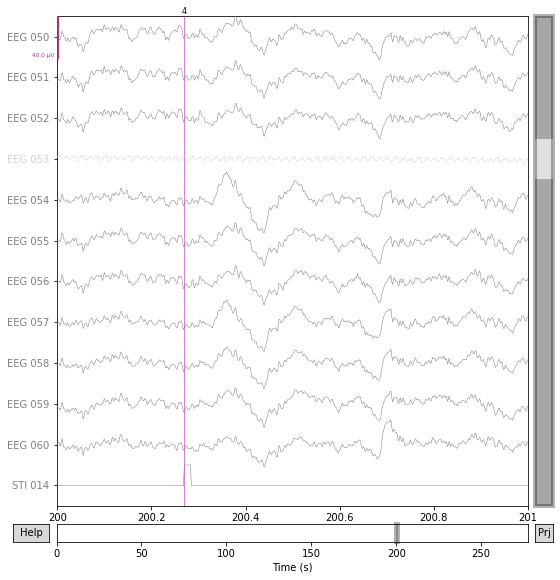

In [75]:
ecg50to60 = raw.plot(order = chan_idxs_50_to_60, events=events, start=200, duration=1, color='gray',
         event_color={1: 'r', 2: 'g', 3: 'b', 4: 'm', 5: 'y', 32: 'k'})

#References: https://mne.tools/stable/auto_tutorials/raw/20_event_arrays.html

In [76]:
# You did it!!
#
# ┈┈┈┈┈┈▕▔╲
# ┈┈┈┈┈┈┈▏▕
# ┈┈┈┈┈┈┈▏▕▂▂▂
# ▂▂▂▂▂▂╱┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▔▔▔▔▔▔╲▂▕▂▂|
#